In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.pipeline import make_pipeline

import os
os.getcwd()

'C:\\Users\\csant\\python_analysis_update'

In [2]:
# Load CSV file of curated/merged data
df = pd.read_csv('c:/csc606/curated colocated data/merged_velocity_data.csv',low_memory=False)

In [3]:
# Create single column in dataframe called "key" that concatenates leg, site, hole, core, section fields to a single key field.
# The key column will be used for joining/merging later
df['key']=df['leg'] + "." + df['site'] + "." + df['hole'] + "." + df['core'] + "." + df['section']

In [4]:
# Create the rho feature, as recommended by Taylor
# rho = absolute difference between GRA density and 0.31 * velocity ^ 0.25
df['rho']=abs(df['GRA_density(g/cm^3)']-(0.31*df['compressional_velocity(m/s)']**0.25))

In [5]:
df

,latitude(dd),longitude(dd),leg,site,hole,core,section,depth_m,compressional_velocity(m/s),calcium_carbonate(wt%),...,natural_gamma_ray_total_counts(cps),GRA_density(g/cm^3),MAD_density(g/cm^3),porosity(%),magnetic_susceptibility(IU),corrected_magnetic_susceptibility(IU),thermal_conductivity_mean(W/mK),strength(kPa),key,rho
0,31.789787,139.026217,350,U1437,D,24,4,645.330,NaN,29.5960,...,NaN,NaN,1.8360,52.1,NaN,NaN,NaN,NaN,350.U1437.D.24.4,NaN
1,31.789787,139.026217,350,U1437,D,53,1,912.683,NaN,57.1270,...,NaN,NaN,2.2950,24.7,NaN,NaN,NaN,NaN,350.U1437.D.53.1,NaN
2,31.789798,139.026523,350,U1437,E,5,3,1113.300,NaN,28.4300,...,NaN,NaN,2.3190,20.0,NaN,NaN,NaN,NaN,350.U1437.E.5.3,NaN
3,-38.829700,178.476055,372A,U1517,C,8,2,41.092,NaN,6.8640,...,NaN,NaN,1.8950,47.8,NaN,NaN,NaN,NaN,372A.U1517.C.8.2,NaN
4,-38.859490,178.896032,375,U1518,F,30,7,472.850,NaN,12.8555,...,NaN,NaN,1.9690,42.9,NaN,NaN,NaN,NaN,375.U1518.F.30.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26157261,19.489617,-82.936100,165,998,A,7,5,62.610,1535.4,NaN,...,NaN,1.740,NaN,NaN,NaN,NaN,1.1414,24.672,165.998.A.7.5,0.200515
26157262,16.553717,-79.867400,165,1000,A,9,3,73.100,2844.3,NaN,...,NaN,1.813,NaN,NaN,NaN,NaN,1.2010,27.698,165.1000.A.9.3,0.450891
26157263,55.477183,-14.650867,162,981,A,7,1,55.150,NaN,NaN,...,NaN,NaN,1.6980,63.2,171.0,NaN,1.2009,36.800,162.981.A.7.1,NaN
26157264,1.202300,-83.737000,111,677,A,27,5,247.550,NaN,NaN,...,NaN,NaN,1.5990,69.6,NaN,NaN,0.9960,69.800,111.677.A.27.5,NaN


In [6]:
# Load CSV file of Taylor's labeled data
labeled_df = pd.read_csv('c:/csc606/image_assessment_augmented.csv',low_memory=False)

# convert int columns to str
labeled_df['leg']=labeled_df['leg'].astype(str)
labeled_df['site']=labeled_df['site'].astype(str)
labeled_df['hole']=labeled_df['hole'].astype(str)
labeled_df['core']=labeled_df['core'].astype(str)
labeled_df['section']=labeled_df['section'].astype(str)

# Create single column in dataframe called "key" that concatenates leg, site, hole, core, section fields to a single key field.
# The key column will be used for joining/merging later
labeled_df['key']=labeled_df['leg'] + "." + labeled_df['site'] + "." + labeled_df['hole'] + "." + labeled_df['core'] + "." + labeled_df['section']


In [7]:
labeled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   leg                          131 non-null    object
 1   site                         131 non-null    object
 2   hole                         131 non-null    object
 3   core                         131 non-null    object
 4   section                      131 non-null    object
 5   file_name                    131 non-null    object
 6   greater_than_50_percent_bad  131 non-null    bool  
 7   notes                        58 non-null     object
 8   key                          131 non-null    object
dtypes: bool(1), object(8)
memory usage: 8.4+ KB


In [8]:
labeled_df

,leg,site,hole,core,section,file_name,greater_than_50_percent_bad,notes,key
0,166,1006,A,13,4,leg166_site1006_holeA_core13_section4.png,False,NaN,166.1006.A.13.4
1,167,1010,B,1,3,leg167_site1010_holeB_core1_section3.png,False,vp lower than I would think should be though,167.1010.B.1.3
2,167,1010,C,4,3,leg167_site1010_holeC_core4_section3.png,False,values > 1800 no good,167.1010.C.4.3
3,167,1010,E,10,4,leg167_site1010_holeE_core10_section4.png,True,< 2000,167.1010.E.10.4
4,167,1010,E,9,3,leg167_site1010_holeE_core9_section3.png,False,NaN,167.1010.E.9.3
...,...,...,...,...,...,...,...,...,...
126,398,U1591,B,5,4,leg398_siteU1591_holeB_core5_section4.png,False,NaN,398.U1591.B.5.4
127,398,U1593,A,34,1,leg398_siteU1593_holeA_core34_section1.png,True,too much spread in vp,398.U1593.A.34.1
128,398,U1598,A,8,1,leg398_siteU1598_holeA_core8_section1.png,False,density is very wrong though too low,398.U1598.A.8.1
129,398,U1600,B,19,1,leg398_siteU1600_holeB_core19_section1.png,False,NaN,398.U1600.B.19.1


In [9]:
# Here we merge the labeled dataset with the curated dataset
merged_labeled_df = pd.merge(labeled_df, df, on='key', how='left')

In [10]:
merged_labeled_df

,leg_x,site_x,hole_x,core_x,section_x,file_name,greater_than_50_percent_bad,notes,key,latitude(dd),...,organic_carbon(wt%),natural_gamma_ray_total_counts(cps),GRA_density(g/cm^3),MAD_density(g/cm^3),porosity(%),magnetic_susceptibility(IU),corrected_magnetic_susceptibility(IU),thermal_conductivity_mean(W/mK),strength(kPa),rho
0,166,1006,A,13,4,leg166_site1006_holeA_core13_section4.png,False,NaN,166.1006.A.13.4,24.399800,...,NaN,11.60,1.922,NaN,NaN,NaN,NaN,NaN,NaN,0.041424
1,166,1006,A,13,4,leg166_site1006_holeA_core13_section4.png,False,NaN,166.1006.A.13.4,24.399800,...,NaN,13.17,1.918,NaN,NaN,NaN,NaN,NaN,NaN,0.033512
2,166,1006,A,13,4,leg166_site1006_holeA_core13_section4.png,False,NaN,166.1006.A.13.4,24.399800,...,NaN,11.97,NaN,NaN,NaN,0.60,0.61,NaN,NaN,NaN
3,166,1006,A,13,4,leg166_site1006_holeA_core13_section4.png,False,NaN,166.1006.A.13.4,24.399800,...,NaN,10.50,1.886,NaN,NaN,0.50,0.79,NaN,NaN,0.072249
4,166,1006,A,13,4,leg166_site1006_holeA_core13_section4.png,False,NaN,166.1006.A.13.4,24.399800,...,NaN,12.67,1.981,NaN,NaN,0.80,0.99,NaN,NaN,0.002379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7015,398,U1600,B,5,1,leg398_siteU1600_holeB_core5_section1.png,True,< 2000,398.U1600.B.5.1,36.543487,...,NaN,NaN,1.503,NaN,NaN,335.87,NaN,NaN,NaN,NaN
7016,398,U1600,B,5,1,leg398_siteU1600_holeB_core5_section1.png,True,< 2000,398.U1600.B.5.1,36.543487,...,NaN,NaN,1.470,NaN,NaN,308.75,NaN,NaN,NaN,NaN
7017,398,U1600,B,5,1,leg398_siteU1600_holeB_core5_section1.png,True,< 2000,398.U1600.B.5.1,36.543487,...,NaN,NaN,1.899,NaN,NaN,450.40,NaN,NaN,NaN,NaN
7018,398,U1600,B,5,1,leg398_siteU1600_holeB_core5_section1.png,True,< 2000,398.U1600.B.5.1,36.543487,...,NaN,NaN,1.515,NaN,NaN,362.61,NaN,NaN,NaN,NaN


In [11]:
# here we create the features:  mean/mode/median/std/min/max for both depth and compressional velocity
# we also create the 25%(Q1) and 75%(Q3) quantiles for compressional velocity within the section
#
# added in v2:  mean/mode/median/std/min/max for the calculated rho feature
#
groupby_columns = ['key','greater_than_50_percent_bad']
df_grouped = merged_labeled_df.groupby(groupby_columns)[['depth_m','compressional_velocity(m/s)','rho']].agg(
    depth_mean=('depth_m','mean'),
    depth_median=('depth_m','median'),
    depth_mode=('depth_m',lambda x: x.mode()[0]),
    depth_std=('depth_m', 'std'),
    depth_min=('depth_m', 'min'),
    depth_max=('depth_m', 'max'),
    velocity_mean=('compressional_velocity(m/s)','mean'),
    velocity_median=('compressional_velocity(m/s)','median'),
    velocity_mode=('compressional_velocity(m/s)',lambda x: x.mode()[0]),
    velocity_std=('compressional_velocity(m/s)', 'std'),
    velocity_min=('compressional_velocity(m/s)', 'min'),
    velocity_max=('compressional_velocity(m/s)', 'max'),
    velocity_q1 =('compressional_velocity(m/s)',lambda x: x.quantile(0.25)),
    velocity_q3 =('compressional_velocity(m/s)',lambda x: x.quantile(0.75)),
    rho_mean=('rho','mean'),
    rho_median=('rho','median'),
    rho_mode=('rho',lambda x: x.mode()[0]),
    rho_std=('rho','std'),
    rho_min=('rho','min'),
    rho_max=('rho','max')
)

In [12]:
df_grouped

,,depth_mean,depth_median,depth_mode,depth_std,depth_min,depth_max,velocity_mean,velocity_median,velocity_mode,velocity_std,velocity_min,velocity_max,velocity_q1,velocity_q3,rho_mean,rho_median,rho_mode,rho_std,rho_min,rho_max
key,greater_than_50_percent_bad,,,,,,,,,,,,,,,,,,,,
166.1006.A.13.4,False,116.851433,116.8715,116.150,0.418404,116.150,117.550,1829.776923,1563.70,1543.5,863.543446,1538.9,4770.2,1543.550,1623.800,0.094487,0.042223,0.002379,0.187294,0.002379,0.741630
167.1010.B.1.3,False,3.480000,3.4800,3.030,0.268452,3.030,3.930,1530.221053,1473.25,1471.1,165.437314,1468.9,2081.4,1471.100,1475.550,0.391715,0.367535,0.317403,0.098948,0.317403,0.896469
167.1010.C.4.3,False,28.210000,28.2100,27.530,0.401248,27.530,28.890,1647.768852,1502.70,1495.6,295.934220,1429.7,2880.1,1497.500,1671.200,0.394486,0.367148,0.273682,0.102646,0.273682,0.789981
167.1010.E.10.4,True,90.240000,90.2400,89.550,0.407022,89.550,90.930,3363.698485,3636.80,1505.8,853.609738,1505.8,4378.3,2848.525,4113.375,0.881427,0.926882,0.441094,0.158597,0.441094,1.104266
167.1010.E.9.3,False,79.240000,79.2400,78.550,0.407022,78.550,79.930,1632.775385,1511.50,1510.5,361.725560,1452.3,3610.1,1508.800,1522.700,0.508159,0.480371,0.420791,0.096032,0.420791,0.934932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398.U1591.B.5.4,False,40.932646,40.9330,40.354,0.331817,40.354,41.489,1549.536585,1559.00,1566.0,35.598524,1410.0,1582.0,1545.000,1566.000,0.246186,0.248053,0.163075,0.045172,0.163075,0.313652
398.U1593.A.34.1,True,227.806071,227.8125,227.100,0.401017,227.100,228.500,1724.730769,1742.50,1750.0,38.301239,1660.0,1801.0,1690.000,1752.000,0.049179,0.055761,0.004361,0.022964,0.004361,0.113587
398.U1598.A.8.1,False,61.359717,61.3500,60.700,0.376413,60.700,62.000,2309.656250,1962.00,1440.0,1165.093783,1440.0,6420.0,1687.750,2234.500,1.038260,1.048302,0.665644,0.302618,0.665644,1.880888


In [13]:
# calculate the interquartile range for compressional velocity between Q1 and Q3
# calculate upper and lower boundaries for compressional velocity which are 1.5x the IGR above the median
#   and 1.5x the IGR below the median
df_grouped['velocity_igr'] = df_grouped['velocity_q3']-df_grouped['velocity_q1']
df_grouped['velocity_upper'] = df_grouped['velocity_median'] + (df_grouped['velocity_igr']*1.5)
df_grouped['velocity_lower'] = df_grouped['velocity_median'] - (df_grouped['velocity_igr']*1.5)

In [14]:
df_grouped

,,depth_mean,depth_median,depth_mode,depth_std,depth_min,depth_max,velocity_mean,velocity_median,velocity_mode,velocity_std,...,velocity_q3,rho_mean,rho_median,rho_mode,rho_std,rho_min,rho_max,velocity_igr,velocity_upper,velocity_lower
key,greater_than_50_percent_bad,,,,,,,,,,,,,,,,,,,,,
166.1006.A.13.4,False,116.851433,116.8715,116.150,0.418404,116.150,117.550,1829.776923,1563.70,1543.5,863.543446,...,1623.800,0.094487,0.042223,0.002379,0.187294,0.002379,0.741630,80.25,1684.075,1443.325
167.1010.B.1.3,False,3.480000,3.4800,3.030,0.268452,3.030,3.930,1530.221053,1473.25,1471.1,165.437314,...,1475.550,0.391715,0.367535,0.317403,0.098948,0.317403,0.896469,4.45,1479.925,1466.575
167.1010.C.4.3,False,28.210000,28.2100,27.530,0.401248,27.530,28.890,1647.768852,1502.70,1495.6,295.934220,...,1671.200,0.394486,0.367148,0.273682,0.102646,0.273682,0.789981,173.70,1763.250,1242.150
167.1010.E.10.4,True,90.240000,90.2400,89.550,0.407022,89.550,90.930,3363.698485,3636.80,1505.8,853.609738,...,4113.375,0.881427,0.926882,0.441094,0.158597,0.441094,1.104266,1264.85,5534.075,1739.525
167.1010.E.9.3,False,79.240000,79.2400,78.550,0.407022,78.550,79.930,1632.775385,1511.50,1510.5,361.725560,...,1522.700,0.508159,0.480371,0.420791,0.096032,0.420791,0.934932,13.90,1532.350,1490.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398.U1591.B.5.4,False,40.932646,40.9330,40.354,0.331817,40.354,41.489,1549.536585,1559.00,1566.0,35.598524,...,1566.000,0.246186,0.248053,0.163075,0.045172,0.163075,0.313652,21.00,1590.500,1527.500
398.U1593.A.34.1,True,227.806071,227.8125,227.100,0.401017,227.100,228.500,1724.730769,1742.50,1750.0,38.301239,...,1752.000,0.049179,0.055761,0.004361,0.022964,0.004361,0.113587,62.00,1835.500,1649.500
398.U1598.A.8.1,False,61.359717,61.3500,60.700,0.376413,60.700,62.000,2309.656250,1962.00,1440.0,1165.093783,...,2234.500,1.038260,1.048302,0.665644,0.302618,0.665644,1.880888,546.75,2782.125,1141.875


In [15]:
# get rid of the indexes created by groupby
df_grouped = df_grouped.reset_index()

# convert the boolean label to numeric 1 and 0
df_grouped['label'] = df_grouped['greater_than_50_percent_bad'].astype(int)
df_grouped

,key,greater_than_50_percent_bad,depth_mean,depth_median,depth_mode,depth_std,depth_min,depth_max,velocity_mean,velocity_median,...,rho_mean,rho_median,rho_mode,rho_std,rho_min,rho_max,velocity_igr,velocity_upper,velocity_lower,label
0,166.1006.A.13.4,False,116.851433,116.8715,116.150,0.418404,116.150,117.550,1829.776923,1563.70,...,0.094487,0.042223,0.002379,0.187294,0.002379,0.741630,80.25,1684.075,1443.325,0
1,167.1010.B.1.3,False,3.480000,3.4800,3.030,0.268452,3.030,3.930,1530.221053,1473.25,...,0.391715,0.367535,0.317403,0.098948,0.317403,0.896469,4.45,1479.925,1466.575,0
2,167.1010.C.4.3,False,28.210000,28.2100,27.530,0.401248,27.530,28.890,1647.768852,1502.70,...,0.394486,0.367148,0.273682,0.102646,0.273682,0.789981,173.70,1763.250,1242.150,0
3,167.1010.E.10.4,True,90.240000,90.2400,89.550,0.407022,89.550,90.930,3363.698485,3636.80,...,0.881427,0.926882,0.441094,0.158597,0.441094,1.104266,1264.85,5534.075,1739.525,1
4,167.1010.E.9.3,False,79.240000,79.2400,78.550,0.407022,78.550,79.930,1632.775385,1511.50,...,0.508159,0.480371,0.420791,0.096032,0.420791,0.934932,13.90,1532.350,1490.650,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,398.U1591.B.5.4,False,40.932646,40.9330,40.354,0.331817,40.354,41.489,1549.536585,1559.00,...,0.246186,0.248053,0.163075,0.045172,0.163075,0.313652,21.00,1590.500,1527.500,0
127,398.U1593.A.34.1,True,227.806071,227.8125,227.100,0.401017,227.100,228.500,1724.730769,1742.50,...,0.049179,0.055761,0.004361,0.022964,0.004361,0.113587,62.00,1835.500,1649.500,1
128,398.U1598.A.8.1,False,61.359717,61.3500,60.700,0.376413,60.700,62.000,2309.656250,1962.00,...,1.038260,1.048302,0.665644,0.302618,0.665644,1.880888,546.75,2782.125,1141.875,0
129,398.U1600.B.19.1,False,87.416433,87.4240,86.700,0.407033,86.700,88.124,1581.000000,1573.50,...,0.209832,0.207669,0.156225,0.033957,0.156225,0.272679,35.00,1626.000,1521.000,0


In [16]:
# pull out the key identifiers to X_identifiers, since they are text and can't be a feature, but we need them later
# drop the label columns and the key
X_identifiers = df_grouped['key']
X = df_grouped.drop('greater_than_50_percent_bad', axis=1).drop('key', axis=1).drop('label', axis=1)

# create the labeled series from the label column
y = df_grouped['label']

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Model selection of Logistic Regression
##model = LogisticRegression(max_iter=5000)
model = RandomForestClassifier(n_estimators=10)

In [19]:
# Model Training
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [20]:
# Model prediction using the test dataset
y_pred = model.predict(X_test)

In [21]:
# Calculate prediction probabilities from test dataset
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [22]:
# Calculate accuracy and create a classification report having precision, recall, f1 score
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [23]:
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)

Accuracy: 0.74

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83        17
           1       1.00      0.30      0.46        10

    accuracy                           0.74        27
   macro avg       0.85      0.65      0.65        27
weighted avg       0.82      0.74      0.69        27



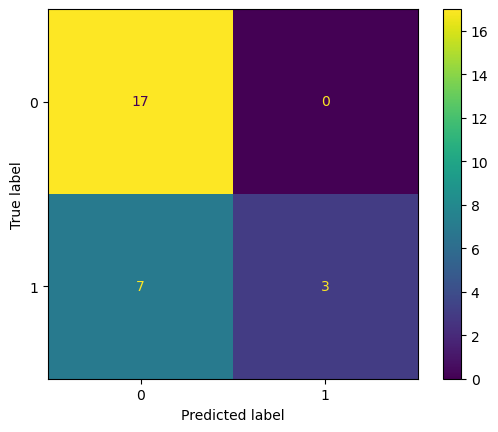

In [24]:
# build confusion matrix for the test dataset
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                              display_labels=model.classes_)
disp.plot()
plt.show()


In [25]:
fs = make_pipeline(
    SelectKBest(score_func=f_classif, k=7), # k=7 based on results of for loop plot below
    RandomForestClassifier(random_state=42)
)
fs.fit(X_train, y_train)
selected_features_mask = fs.named_steps['selectkbest'].get_support()
print(X_train.columns[selected_features_mask])

Index(['velocity_mean', 'velocity_median', 'velocity_std', 'velocity_q1',
       'velocity_q3', 'velocity_igr', 'velocity_upper'],
      dtype='object')


In [26]:
#x_train_fs = fs.transform(X_train)
#x_test_fs = fs.transform(X_test)

In [27]:
#x_train_fs.shape

In [28]:
#model2 = RandomForestClassifier()
#model2.fit(x_train_fs, y_train)
#model2.score(x_test_fs, y_test)
fs.fit(X_train, y_train)
fs.score(X_test, y_test)

0.8148148148148148

In [29]:
#model2.score(x_train_fs, y_train)
fs.score(X_train, y_train)

1.0

In [30]:
# Plot the importance of each feature
# Code from:  Murach's Python for Data Science, 2nd Edition, Chapter 11
df1 = pd.DataFrame(X_train.columns[selected_features_mask], columns=['feature'])
df2 = pd.DataFrame(fs.named_steps['selectkbest'].scores_[selected_features_mask], columns=['importance'])
importance = df1.join(df2)
importance.sort_values('importance', ascending=False)

,feature,importance
6,velocity_upper,52.321892
4,velocity_q3,46.142525
5,velocity_igr,37.190874
1,velocity_median,35.536201
0,velocity_mean,33.587389
3,velocity_q1,17.016435
2,velocity_std,15.212255


In [31]:
# Model prediction using the test dataset
y_pred = fs.predict(X_test)

# Calculate prediction probabilities from test dataset
y_pred_prob = fs.predict_proba(X_test)[:, 1]

# Calculate accuracy and create a classification report having precision, recall, f1 score
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", report)


Accuracy: 0.81

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86        17
           1       0.86      0.60      0.71        10

    accuracy                           0.81        27
   macro avg       0.83      0.77      0.79        27
weighted avg       0.82      0.81      0.81        27



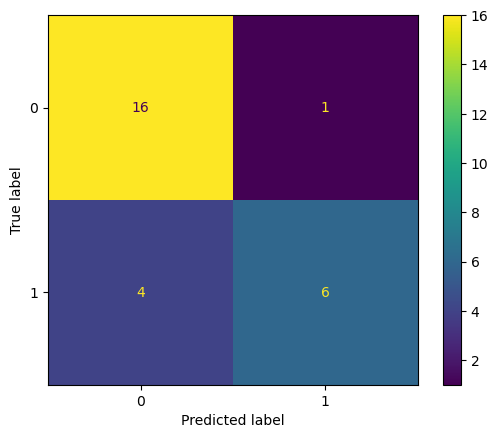

In [32]:

# build confusion matrix for the test dataset
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,
                              display_labels=fs.classes_)
disp.plot()
plt.show()

<Axes: xlabel='numFeatures'>

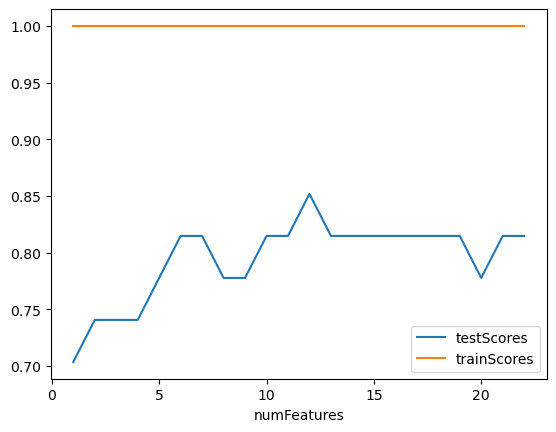

In [33]:
# Score the model for test/train datasets for varying number of features
#
# Code from:  Murach's Python for Data Science, 2nd Edition, Chapter 11
#

model2 = RandomForestClassifier()
testScores = []
trainScores = []

for i in range(1, len(X_train.columns)):
    fs = SelectKBest(score_func=f_classif, k=i)
    fs.fit(X_train, y_train)

    x_train_fs = fs.transform(X_train)
    x_test_fs = fs.transform(X_test)

    model2.fit(x_train_fs, y_train)
    
    testScore = model2.score(x_test_fs, y_test)
    trainScore = model2.score(x_train_fs, y_train)
    testScores.append(testScore)
    trainScores.append(trainScore)
    
df = pd.DataFrame(data={'testScores':testScores, 'trainScores':trainScores})
df.reset_index(inplace=True)
df.rename(columns={'index':'numFeatures'}, inplace=True)
df.numFeatures = df.numFeatures + 1
df.plot(x='numFeatures', y=['testScores','trainScores'])